## Загрузка данных 


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!gdown 1gmJENWufjB7JOsSDmEDlElTnsSXBS_zg # train.csv
!gdown 10anC8nekOECcwJOtqNRKtRHVN4yGmgvD  # test.csv

Downloading...
From: https://drive.google.com/uc?id=1gmJENWufjB7JOsSDmEDlElTnsSXBS_zg
To: /content/train.csv
100% 664k/664k [00:00<00:00, 164MB/s]
Downloading...
From: https://drive.google.com/uc?id=10anC8nekOECcwJOtqNRKtRHVN4yGmgvD
To: /content/test.csv
100% 218k/218k [00:00<00:00, 128MB/s]


In [ ]:
data = pd.read_csv('./train.csv')
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [ ]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
for i in range(3):
  print(feature_cols[i])

ClientPeriod
MonthlySpending
TotalSpent


In [ ]:
#Для просмотра случайных строк можно использовать метод sample() у объекта DataFrame. Например, так:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1342,25,84.80,2043.45,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,1
4006,13,94.10,1215.6,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,No,Electronic check,1
3178,58,103.25,6017.65,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),1
3162,23,74.95,1710.45,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
4592,42,20.65,958.1,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0


In [ ]:
#Для проверки наличия незаполненных значений в датасете можно воспользоваться методом isna() 
#у объекта DataFrame, который возвращает DataFrame той же формы, что и исходный, 
#но заполненный булевыми значениями, равными True для каждой ячейки, содержащей NaN, и False в противном случае. 
#Можно посчитать сумму True по столбцам, чтобы узнать количество NaN в каждой колонке.
nan_counts = data.isna().sum()
print(nan_counts)
#Пропущенных значений в данном датасете нет

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64


In [ ]:
data.info()
#Числовой признак totalspent в нашем датасете записан не как число, исправим это

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
#При попытке поменять тип колонки, мы обнаружили, что есть такое значение "", которое не преобразовать во float. Заменим все "" на 0
try:
  data['TotalSpent'] = data['TotalSpent'].astype(float)
except Exception as e:
  print(e)

could not convert string to float: ''


In [ ]:
data['TotalSpent'] = data['TotalSpent'].replace(' ', '0')


In [ ]:
try:
  data['TotalSpent'] = data['TotalSpent'].astype(float)
except Exception as e:
  print(e)

In [ ]:
# Таблица с количеством NaN в каждой колонке
nan_table = pd.concat([nan_counts, nan_counts / len(data)], axis=1)
nan_table.columns = ['NaN count', 'NaN proportion']
print(nan_table)

                          NaN count  NaN proportion
ClientPeriod                      0             0.0
MonthlySpending                   0             0.0
TotalSpent                        0             0.0
Sex                               0             0.0
IsSeniorCitizen                   0             0.0
HasPartner                        0             0.0
HasChild                          0             0.0
HasPhoneService                   0             0.0
HasMultiplePhoneNumbers           0             0.0
HasInternetService                0             0.0
HasOnlineSecurityService          0             0.0
HasOnlineBackup                   0             0.0
HasDeviceProtection               0             0.0
HasTechSupportAccess              0             0.0
HasOnlineTV                       0             0.0
HasMovieSubscription              0             0.0
HasContractPhone                  0             0.0
IsBillingPaperless                0             0.0
PaymentMetho

In [ ]:
#Если бы в датасете были NaN, то их можно было бы заменить их на какое-то значение с помощью метода fillna() у объекта DataFrame. Например, можно заменить NaN на среднее значение по колонке:
data.fillna(data.mean(), inplace=True)

<ipython-input-14-e8bf9ff0dde8>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


## Анализ данных 

In [ ]:
#print(max(data["TotalSpent"]))
data["TotalSpent"].describe()

count    5282.000000
mean     2287.486161
std      2269.049195
min         0.000000
25%       395.725000
50%      1405.650000
75%      3795.212500
max      8684.800000
Name: TotalSpent, dtype: float64

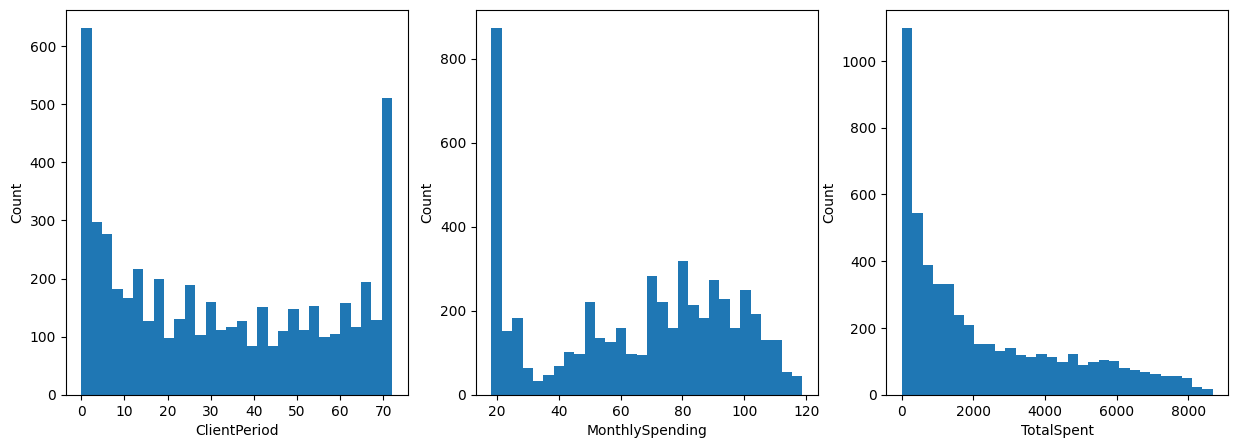

In [ ]:
#Для численных признаков построим гистограммы:

fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15,5))
for i in range(len(num_cols)):
    ax[i].hist(data[num_cols[i]], bins=30)
    ax[i].set_xlabel(num_cols[i])
    ax[i].set_ylabel('Count')
plt.show()

#Этот код создает одну строку графиков, количество которых равно числу числовых признаков (переменная len(num_cols)), и каждый график содержит гистограмму значений для соответствующего признака.

#Цикл for проходит по каждому признаку в списке num_cols и создает гистограмму с помощью функции ax[i].hist(). bins=30 означает, что гистограмма будет иметь 30 столбцов. Затем, ax[i].set_xlabel(num_cols[i]) устанавливает подпись оси x для каждого графика в соответствии с именем признака, а ax[i].set_ylabel('Count') устанавливает подпись оси y в виде 'Count'.

#В конце plt.show() выводит графики.

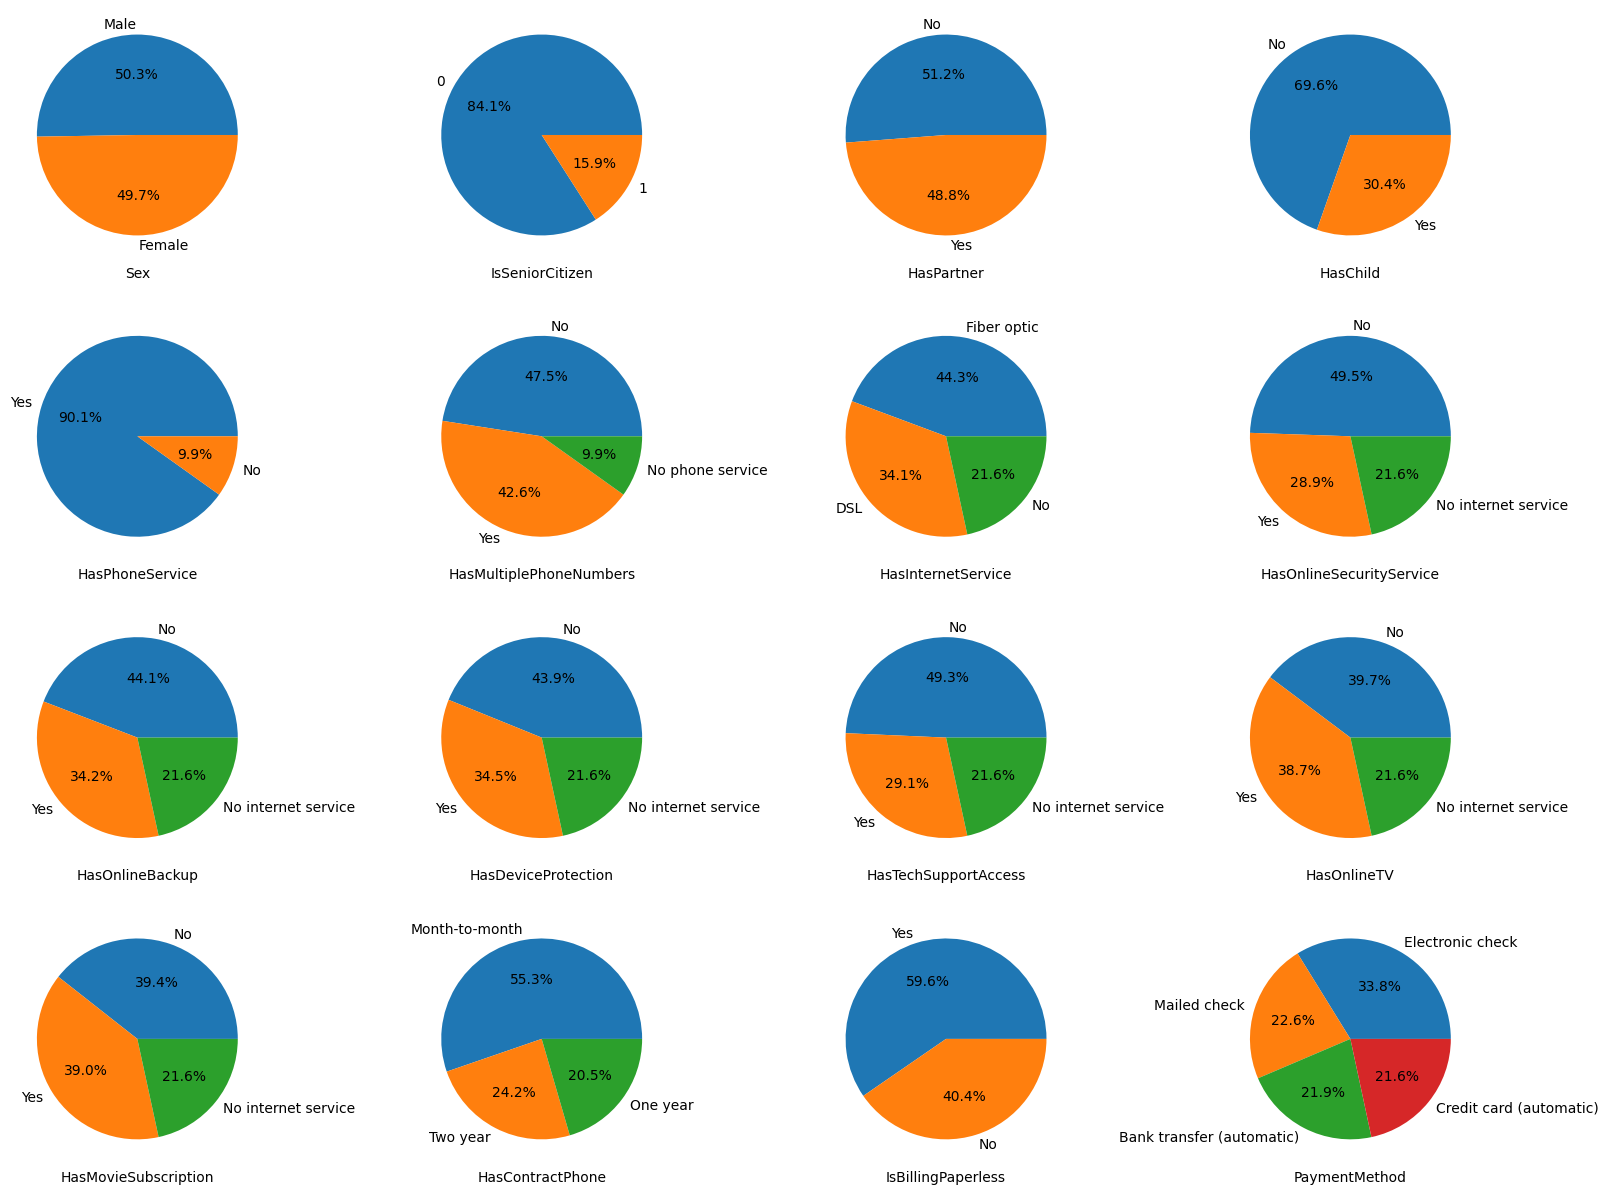

In [ ]:
#Для категориальных признаков построим круговые диаграммы:

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20,15))
for i, col in enumerate(cat_cols):
    r = i // 4
    c = i % 4
    value_counts = data[col].value_counts()
    ax[r, c].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    ax[r, c].set_xlabel(col)
plt.show()

# Создается фигура (fig) и набор подграфиков (ax) размером 4x4 (4 строки, 4 столбца) и заданным размером (figsize=(20,15)).
# В цикле for проходятся все категориальные признаки (col) в списке cat_cols. Переменная i содержит номер признака в списке.
# Вычисляются номер строки и столбца на основе переменной i. Это происходит с помощью целочисленного деления на 4 (i // 4) и остатка от деления на 4 (i % 4).
# Вычисляются частоты значений признака (value_counts) с помощью метода value_counts() для столбца col в датафрейме data.
# На каждом подграфике ax[r, c] рисуется круговая диаграмма с частотами значений (value_counts.values) и метками соответствующих значений (value_counts.index). Также добавляется подпись оси x с названием признака (col) и форматирование процентов с помощью параметра autopct='%1.1f%%'.
# Выводятся все подграфики в фигуре с помощью метода plt.show().

0    3898
1    1384
Name: Churn, dtype: int64


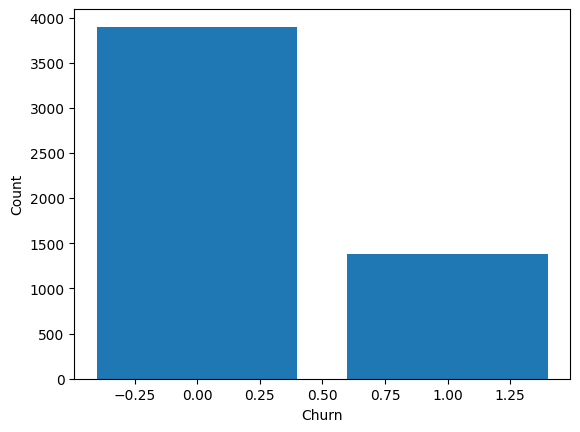

Дисбаланс классов: 2.816473988439306


In [ ]:
#Посмотрим на распределение целевой переменной и проверим, являются ли классы несбалансированными:

# Распределение целевой переменной
target_counts = data[target_col].value_counts()
print(target_counts)

# Визуализация распределения целевой переменной
plt.bar(target_counts.index, target_counts.values)
plt.xlabel(target_col)
plt.ylabel('Count')
plt.show()

# Проверка баланса классов
print('Дисбаланс классов:', target_counts[0] / target_counts[1]) #В данном случае наблюдений класса 0 почти в 3 раза больше, чем класса 1. Датасет несбалансирован, но не сильно. Пока что не будем беспокоиться об этом.

## Применение моделей 

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [ ]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

column_transformer = make_column_transformer(
    (num_transformer, num_cols),
    (cat_transformer, cat_cols),
    remainder='passthrough'
)

clf = make_pipeline(column_transformer, LogisticRegression(max_iter=1000))

params = {'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(clf, params, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(data[feature_cols], data[target_col])
print(grid_search.best_params_, " ", grid_search.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'logisticregression__C': 100}   0.8451139235772726


Данный код строит пайплайн для обработки данных и логистической регрессии, а затем применяет поиск по сетке (grid search) для подбора лучшего значения параметра С в модели логистической регрессии.

  1)num_transformer = StandardScaler() - создание объекта класса StandardScaler() для стандартизации числовых признаков.

  2)cat_transformer = OneHotEncoder(handle_unknown='ignore') - создание объекта класса OneHotEncoder() для преобразования категориальных признаков в one-hot кодировку.

  3)column_transformer = make_column_transformer((num_transformer, num_cols), (cat_transformer, cat_cols), remainder='passthrough') - создание объекта класса ColumnTransformer() для преобразования данных в пайплайне. Объект принимает список кортежей, где каждый кортеж состоит из двух элементов: трансформер и список столбцов, к которым нужно применить этот трансформер. Аргумент remainder='passthrough' указывает, что все оставшиеся столбцы не должны быть преобразованы и должны быть переданы "как есть".

  4)clf = make_pipeline(column_transformer, LogisticRegression(max_iter=1000)) - создание пайплайна, включающего в себя обработку данных с помощью column_transformer и модель логистической регрессии с параметром max_iter=1000.

  5) params = {'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]} - задание сетки параметров для поиска лучшего значения параметра C. Параметр logisticregression__C задает значение параметра C в модели логистической регрессии.

  6)grid_search = GridSearchCV(clf, params, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1) - создание объекта класса GridSearchCV() для поиска лучшего значения параметра C в модели логистической регрессии. Аргумент clf задает пайплайн для обработки данных и моделирования, а params - сетку параметров, которые нужно протестировать. Аргументы cv=5, scoring='roc_auc' и verbose=1 задают соответственно число фолдов в кросс-валидации, метрику качества для оценки модели и уровень детализации вывода. Аргумент n_jobs=-1 указывает, что поиск по сетке может использовать все доступные процессоры.

  7)grid_search.fit(data[feature_cols], data[target_col]) - запуск поиска по сетке.

{C': 100}   0.8451139235772726 - Параметр и лучшее кчество


### Применение градиентного бустинга 

In [ ]:
%pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.7 MB/s eta 0:00:00


In [ ]:
#Разделение выборки на train/valid и тестирование CatBoost со стандартными параметрами:

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Разделение на train/valid
X_train, X_valid, y_train, y_valid = train_test_split(data[feature_cols], data[target_col], 
                                                      test_size=0.2, random_state=42)

# Создание и обучение модели с параметрами по умолчанию
model = CatBoostClassifier(cat_features=cat_cols, random_state=42)
model.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=False)

# Оценка качества на валидационной выборке
y_pred_proba = model.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print("ROC-AUC на валидационной выборке: {:.4f}".format(roc_auc))

ROC-AUC на валидационной выборке: 0.8323


In [ ]:
#Тестируем разные значения параметров количества деревьев и learning_rate'а и выбираем лучшую по метрике ROC-AUC комбинацию:

# Создание сетки гиперпараметров
params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 500]
}

# Создание объекта GridSearchCV и запуск подбора параметров
grid_search = GridSearchCV(CatBoostClassifier(cat_features=cat_cols, random_state=42), 
                           params, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(data[feature_cols], data[target_col])

# Вывод результатов
print("Лучшие гиперпараметры: ", grid_search.best_params_)
print("ROC-AUC на кросс-валидации: {:.4f}".format(grid_search.best_score_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0:	learn: 0.6570323	total: 6.34ms	remaining: 628ms
1:	learn: 0.6253266	total: 11.6ms	remaining: 568ms
2:	learn: 0.5997612	total: 17.6ms	remaining: 569ms
3:	learn: 0.5789832	total: 23.6ms	remaining: 566ms
4:	learn: 0.5599958	total: 28.9ms	remaining: 549ms
5:	learn: 0.5448213	total: 34.4ms	remaining: 538ms
6:	learn: 0.5314895	total: 40.1ms	remaining: 532ms
7:	learn: 0.5187655	total: 45.6ms	remaining: 524ms
8:	learn: 0.5079715	total: 51ms	remaining: 516ms
9:	learn: 0.4984954	total: 56.4ms	remaining: 508ms
10:	learn: 0.4905097	total: 62.2ms	remaining: 503ms
11:	learn: 0.4837516	total: 66.9ms	remaining: 491ms
12:	learn: 0.4756881	total: 72.4ms	remaining: 485ms
13:	learn: 0.4687855	total: 77.8ms	remaining: 478ms
14:	learn: 0.4629881	total: 83.1ms	remaining: 471ms
15:	learn: 0.4577009	total: 88.5ms	remaining: 465ms
16:	learn: 0.4517686	total: 94ms	remaining: 459ms
17:	learn: 0.4467863	total: 99.7ms	remaining: 454ms
18:	learn: 0.44270

Лучшие гиперпараметры:  {'learning_rate': 0.1, 'n_estimators': 100}
ROC-AUC на кросс-валидации: 0.8471

# Предсказания

In [ ]:
best_model = grid_search

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] =  best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv', index=False)

In [ ]:
df = pd.read_csv('./my_submission.csv')
df.head(10)

,Id,Churn
0,0,0.039341
1,1,0.710705
2,2,0.634464
3,3,0.021342
4,4,0.007683
5,5,0.088881
6,6,0.560921
7,7,0.308973
8,8,0.062340
9,9,0.386064
